<font size = +1><b> Компании нужно сгруппировать клиентов для АБ-тестов. Алгоритм группировки очень простой - взять ID клиента (состоит из 5-7 цифр, например 7412567) и найти сумму всех его цифр. Получившееся число и является номером группы, в которую входит данный клиент.</b></font><br>

**1. Функция, которая подсчитывает число покупателей, попадающих в каждую группу, если нумерация ID сквозная и начинается с 0. На вход функция получает целое число n_customers (количество клиентов).**

***Коментарий***

По условию ID клиента состоит из 5-7 цифр и начинается с 0. Также сказано, что нумерация сквозная, то есть идет по порядку. Значит, ID принимает вид: 00001, 00002, 00003 и т.д. Нули, стоящие впереди не имеют значения при суммировании. Таким образом, мы можем их не учитывать при подсчете суммы. 

In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
def sum_of_numbers(number: int):
    '''
    Input:
        number - число, сумму цифр которого хоти посчитать.
    Output:
        summa - получившаяся сумма
    '''
    summa = 0
    while number != 0:
        summa += number%10
        number=number//10
        
    return summa

In [3]:
def num_per_group_v1(num_customers: int):
    '''
    Input:
        num_customers - Количество покупателей. 
                        Не превышает значение 1e7, т.к. это уже восьмизначное число.
    Output:
        dict_num - словарь {номер группы: число покупателей} 
    '''
    if num_customers >= 1e7:
        raise Exception("num_customers out of range")
    dict_num = {}
    for i in range(num_customers):
        #key = sum(list(map(int, str(i)))) # можно, но работает медленнее
        key = sum_of_numbers(i)
        dict_num[key] = dict_num.get(key, 0) + 1
        
    return dict_num

In [4]:
random.seed(12345)
num_customers = random.randint(100, 500)
print(f'Количество клиентов - {num_customers}')

Количество клиентов - 313


In [5]:
num_per_group_v1(num_customers)

{0: 1,
 1: 3,
 2: 6,
 3: 10,
 4: 14,
 5: 17,
 6: 20,
 7: 22,
 8: 25,
 9: 28,
 10: 29,
 11: 28,
 12: 25,
 13: 21,
 14: 18,
 15: 15,
 16: 12,
 17: 9,
 18: 6,
 19: 3,
 20: 1}

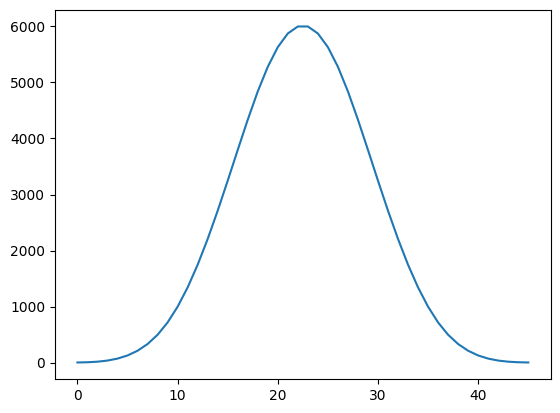

In [6]:
d = num_per_group_v1(100000)
plt.plot(d.keys(),d.values())

**2. Функция, аналогичная первой, если ID начинается с произвольного числа. На вход функция получает целые числа: n_customers (количество клиентов) и n_first_id (первый ID в последовательности).**

In [7]:
def num_per_group_v2(num_customers: int, n_first_id: int):
    '''
    Input:
        num_customers - Количество покупателей. 
                        Необходимо, чтобы было в диапазоне 1e7 - n_first_id.
        n_first_id -  номер первого id, который необходимо создать.
    Output:
        dict_num - словарь {номер группы: число покупателей} 
    '''
    if n_first_id >= 1e7:
        raise Exception("n_first_id out of range")
    if num_customers > 1e7 - n_first_id:
        raise Exception(f"num_customers can't be {str(num_customers)}")
        
    dict_num = {}
    for i in range(n_first_id, n_first_id + num_customers):
        key = sum_of_numbers(i)
        dict_num[key] = dict_num.get(key, 0) + 1
        
    return dict_num

In [8]:
random.seed(12345)
n_first_id = random.randint(100,400)
print(f'Первый ID - {n_first_id}')
num_customers = random.randint(100, 500)
print(f'Количество клиентов - {num_customers}')

Первый ID - 313
Количество клиентов - 475


In [9]:
num_per_group_v2(num_customers,n_first_id)

{7: 14,
 8: 19,
 9: 24,
 10: 29,
 11: 34,
 12: 39,
 13: 43,
 5: 4,
 6: 8,
 14: 44,
 15: 43,
 16: 39,
 17: 34,
 18: 29,
 19: 24,
 20: 19,
 21: 14,
 4: 1,
 22: 9,
 23: 4,
 24: 1}

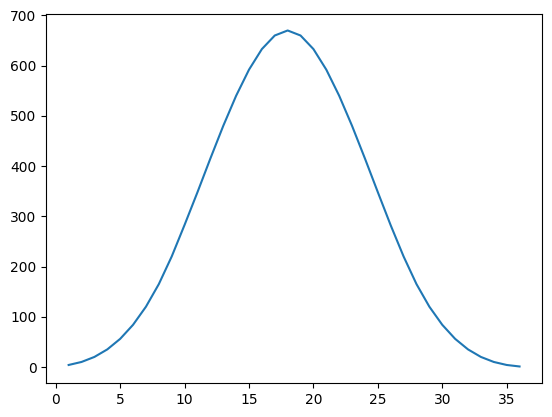

In [10]:
d = num_per_group_v2(10000,10)
plt.plot(d.keys(),d.values())

<font size = +1><b>Вывод</b></font><br>

Не думаю, что выбор данного алгоритма можно назвать удачным. При таком разбиении на группы мы получаем картину, при которой численность этих групп распределена нормально. Это говорит о том, что численность клиентов в одной группе может быть гораздо больше, чем в другой. 

Чтобы клиенты были распределены равномерно (или почти равномерно), разбиение можно проводить, например, по остатку от деления порядкового номера на необходимое количество групп. 

In [11]:
def num_per_group_v3(num_customers: int, num_groups: int):
    '''
    Input:
        num_customers - Количество покупателей. 
                        Не превышает значение 1e7, т.к. это уже восьмизначное число. 
        num_groups - количество групп. 
    Output:
        dict_num - словарь {номер группы: число покупателей} 
    '''
    if num_customers >= 1e7:
        raise Exception("num_customers out of range")
    dict_num = {}
    for i in range(num_customers):
        key = i%num_groups
        dict_num[key] = dict_num.get(key, 0) + 1
        
    return dict_num

{0: 500,
 1: 500,
 2: 500,
 3: 500,
 4: 500,
 5: 500,
 6: 500,
 7: 500,
 8: 500,
 9: 500,
 10: 500,
 11: 500,
 12: 500,
 13: 500,
 14: 500,
 15: 500,
 16: 500,
 17: 500,
 18: 500,
 19: 500}

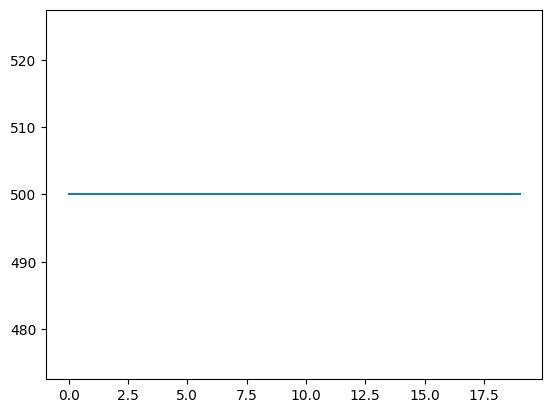

In [12]:
d = num_per_group_v3(10000,20)
plt.plot(d.keys(),d.values())
d

{0: 477,
 1: 477,
 2: 477,
 3: 477,
 4: 476,
 5: 476,
 6: 476,
 7: 476,
 8: 476,
 9: 476,
 10: 476,
 11: 476,
 12: 476,
 13: 476,
 14: 476,
 15: 476,
 16: 476,
 17: 476,
 18: 476,
 19: 476,
 20: 476}

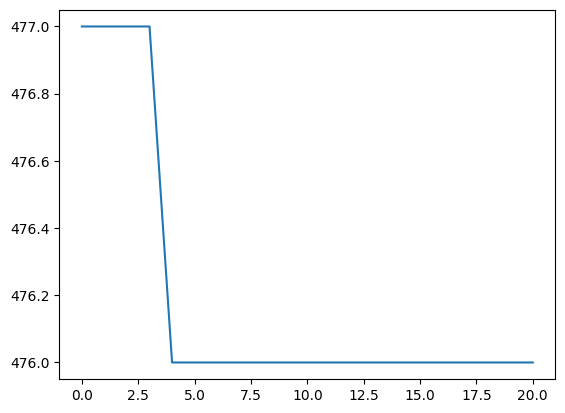

In [13]:
d = num_per_group_v3(10000,21)
plt.plot(d.keys(),d.values())
d